In [1]:
#Libraries
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

## Data Preparation

In [13]:
#Loading Data
DATA=pd.read_excel(r'ML1-PreMon1.xlsx',sheet_name='Sheet1')
y=pd.Series(DATA.LWP)
X=DATA.loc[:,~DATA.columns.isin(['LWP','Latitude', 'Longitude'])]

In [14]:
#Split dataset into training set and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)#80% training and 20% test

## Model training

In [51]:
#Create gradientboost REGRESSOR object
gradientregressor=GradientBoostingRegressor(max_depth=8,n_estimators=150,learning_rate=0.05)
#Training
model=gradientregressor.fit(X_train,y_train)
#Testing
y_pred=model.predict(X_test)

In [53]:
r2_score(y_test,y_pred)

0.3307639091591348

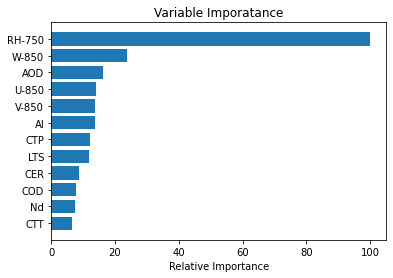

In [54]:
import matplotlib.pyplot as plt

#plot feature importance
feature_importance = model.feature_importances_

#make importances relative to mac importance
feature_importance=100.0 * (feature_importance/feature_importance.max())
sorted_idx=np.argsort(feature_importance)
pos=np.arange(sorted_idx.shape[0])+.5
plt.barh(pos, feature_importance[sorted_idx],align='center')
plt.yticks(pos, DATA.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Imporatance')
plt.show()

## Tuning hyperparameters

In [55]:
from sklearn.model_selection import GridSearchCV
LR={'learning_rate':[0.15,0.10,0.05],'n_estimators':[100,150,200,250],'max_depth':[8,12,16,18,20,22,24,26,28,30]}
# ({'learning_rate': 0.05, 'n_estimators': 150}, 0.29390349089746487)
tuning=GridSearchCV(estimator=GradientBoostingRegressor(),
            param_grid=LR,scoring='r2')
tuning.fit(X_train,y_train)
tuning.best_params_, tuning.best_score_

({'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 150},
 0.32037439620738944)